In [1]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = 'data/gaia/' + urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/AstronomicalData/raw/main/' +
         'data/gd1_data.hdf')

Downloaded gd1_data.hdf


In [12]:
download('https://github.com/AllenDowney/AstronomicalData/raw/main/' +
         'data/MIST_iso_5fd2532653c27.iso.cmd')

download('https://github.com/jieunchoi/MIST_codes/raw/master/scripts/' +
         'read_mist_models.py')

import read_mist_models

filename = 'MIST_iso_5fd2532653c27.iso.cmd'
iso = read_mist_models.ISOCMD(filename)

Downloaded MIST_iso_5fd2532653c27.iso.cmd
Downloaded read_mist_models.py
Reading in: MIST_iso_5fd2532653c27.iso.cmd


In [3]:
import pandas as pd

filename = 'gd1_data.hdf'
candidate_df = pd.read_hdf(filename, 'candidate_df')

candidate_df.head()

,source_id,ra,dec,pmra,pmdec,best_neighbour_multiplicity,number_of_mates,g_mean_psf_mag,i_mean_psf_mag,phi1,phi2,pm_phi1,pm_phi2
0,635860218726658176,138.518707,19.092339,-5.941679,-11.346409,1,0,17.8978,17.517401,-59.247330,-2.016078,-7.527126,1.748779
1,635674126383965568,138.842874,19.031798,-3.897001,-12.702780,1,0,19.2873,17.678101,-59.133391,-2.306901,-7.560608,-0.741800
2,635535454774983040,137.837752,18.864007,-4.335041,-14.492309,1,0,16.9238,16.478100,-59.785300,-1.594569,-9.357536,-1.218492
3,635497276810313600,138.044516,19.009471,-7.172931,-12.291499,1,0,19.9242,18.334000,-59.557744,-1.682147,-9.000831,2.334407
4,635614168640132864,139.592197,18.807956,-3.309603,-13.708905,1,0,16.1516,14.666300,-58.938113,-3.024192,-8.062762,-1.869082


In [10]:
import matplotlib.pyplot as plt

# --- Plot Parameters ---- 
plt.rcParams["figure.figsize"] = (10,8)
plt.rcParams["figure.dpi"] = 100
# plt.rc('font', family = 'serif', serif = 'cmr10') 
plt.rcParams.update({# Use mathtext, not LaTeX
                            'text.usetex': False,
                            # Use the Computer modern font
                            'font.family': 'serif',
                            'font.serif': 'cmr10',
                            'mathtext.fontset': 'cm',
                            })
plt.rcParams.update({'font.size': 22})
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
colour_arrays = ['red', 'blue', 'green', 'crimson', 'lime']

def plot_cmd(table):
    """Plot a color magnitude diagram.
    
    table: Table or DataFrame with photometry data
    """
    y = table['g_mean_psf_mag']
    x = table['g_mean_psf_mag'] - table['i_mean_psf_mag']

    plt.plot(x, y, 'ko', markersize=0.3, alpha=0.5)

    plt.xlim([0, 1.5])
    plt.ylim([14, 22])
    plt.gca().invert_yaxis()

    plt.ylabel('Magnitude $(g)$')
    plt.xlabel('Color $(g-i)$')


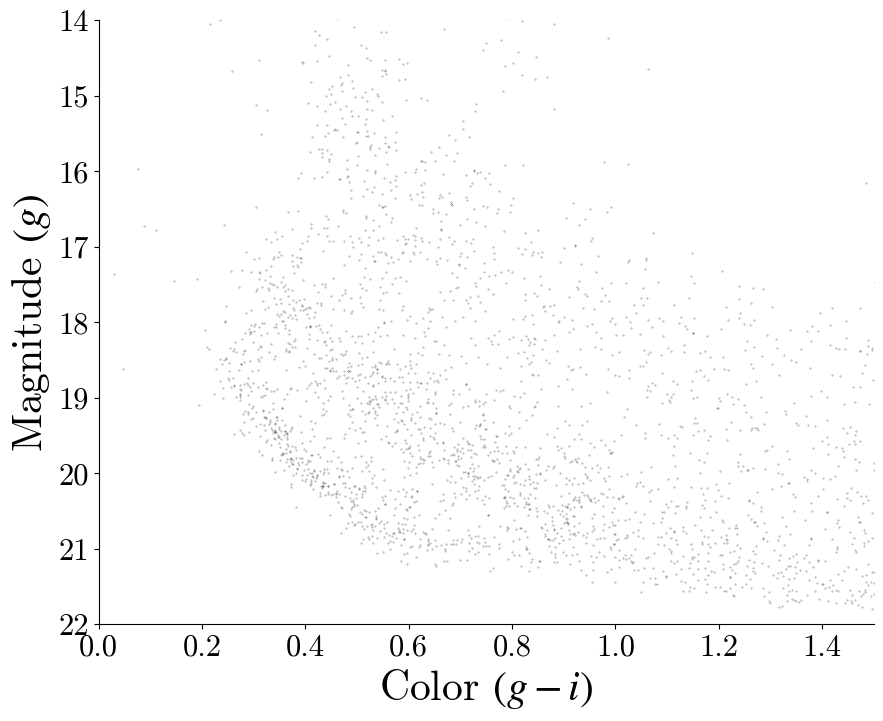

In [11]:
plot_cmd(candidate_df)

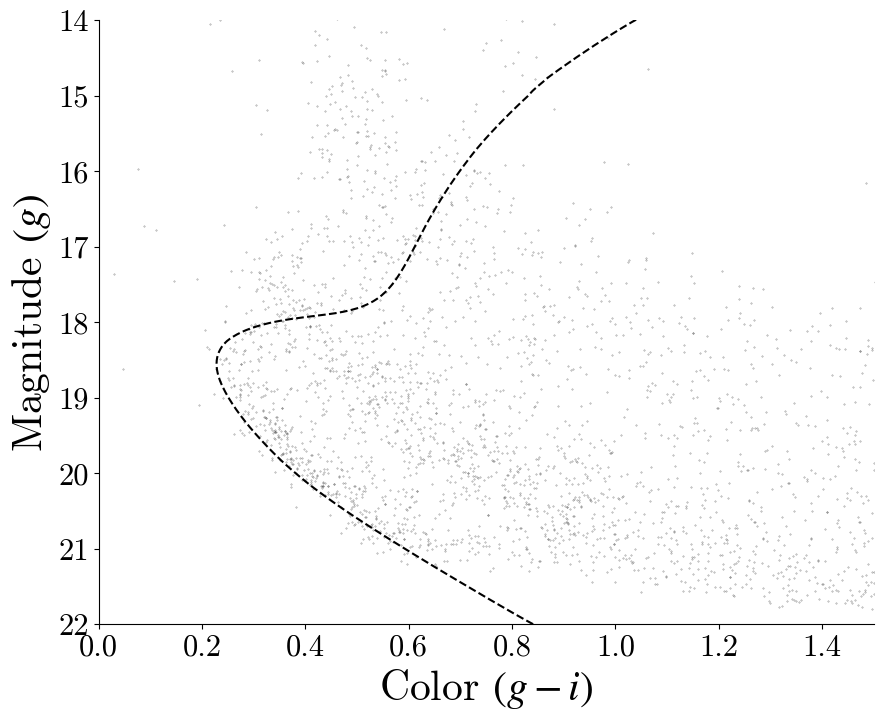

In [18]:
import astropy.coordinates as coord
import astropy.units as u

iso_array = iso.isocmds[0]

distance = 7.8 * u.kpc
distmod = coord.Distance(distance).distmod.value

phase_mask = (iso_array['phase'] >= 0) & (iso_array['phase'] < 3)
phase_mask.sum()

main_sequence = iso_array[phase_mask]
len(main_sequence)

mag_g = main_sequence['PS_g'] + distmod
color_g_i = main_sequence['PS_g'] - main_sequence['PS_i']

plot_cmd(candidate_df)
plt.plot(color_g_i, mag_g, 'k--')